In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn import metrics as ms
import numpy as np

In [3]:
# Read in the files
df=pd.read_csv('..//ML_Table.csv')
df.head()

,country_code,area,year_pc,CO2_emissions_tonnes,Population,category_code_1,food_product_categories_1,production_tonnes_1,total_kgs_CO2_1,category_code_2,...,production_tonnes_41,total_kgs_CO2_41,category_code_42,food_product_categories_42,production_tonnes_42,total_kgs_CO2_42,category_code_43,food_product_categories_43,production_tonnes_43,total_kgs_CO2_43
0,0,Afghanistan,2000,71679740.0,19542982,1,Apples,40540.06,58783.0870,2,...,0.0,0.0,42,Wheat & Rye (Bread),1470000.0,10518040.0,43,Wine,0.0,0.0
1,0,Afghanistan,2001,72477702.0,19688632,1,Apples,39541.74,57335.5230,2,...,0.0,0.0,42,Wheat & Rye (Bread),1600000.0,11434520.0,43,Wine,0.0,0.0
2,0,Afghanistan,2002,73529311.0,21000256,1,Apples,35630.08,51663.6160,2,...,0.0,0.0,42,Wheat & Rye (Bread),2690000.0,19231760.0,43,Wine,0.0,0.0
3,0,Afghanistan,2003,74715262.0,22645130,1,Apples,28042.99,40662.3355,2,...,0.0,0.0,42,Wheat & Rye (Bread),3480000.0,24916800.0,43,Wine,0.0,0.0
4,0,Afghanistan,2004,75604429.0,23553551,1,Apples,16691.83,24203.1535,2,...,0.0,0.0,42,Wheat & Rye (Bread),2390000.0,17112400.0,43,Wine,0.0,0.0


In [4]:
# Set variables
y = df ['CO2_emissions_tonnes']
X = df [['Population','total_kgs_CO2_1','total_kgs_CO2_2','total_kgs_CO2_3','total_kgs_CO2_4','total_kgs_CO2_6','total_kgs_CO2_','total_kgs_CO2_8','total_kgs_CO2_9','total_kgs_CO2_10','total_kgs_CO2_11','total_kgs_CO2_12','total_kgs_CO2_13','total_kgs_CO2_14','total_kgs_CO2_15','total_kgs_CO2_17','total_kgs_CO2_18','total_kgs_CO2_19','total_kgs_CO2_20','total_kgs_CO2_21','total_kgs_CO2_22','total_kgs_CO2_23','total_kgs_CO2_24','total_kgs_CO2_25','total_kgs_CO2_26','total_kgs_CO2_27','total_kgs_CO2_28','total_kgs_CO2_29','total_kgs_CO2_30','total_kgs_CO2_31','total_kgs_CO2_32','total_kgs_CO_33','total_kgs_CO2_34','total_kgs_CO2_35','total_kgs_CO2_37','total_kgs_CO2_39','total_kgs_CO2_40','total_kgs_CO2_41','total_kgs_CO2_42','total_kgs_CO2_43']]
X.shape

(4201, 40)

In [5]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape

(3150, 40)

In [6]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [7]:
y_pred = regressor.predict(X_test)
y_pred

array([4.42755351e+07, 3.70997552e+07, 5.20413452e+07, ...,
       8.62733467e+10, 4.22935520e+06, 2.06422432e+07])

In [8]:
pred_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
pred_df

,Real Values,Predicted Values
3604,4.245974e+07,4.427554e+07
781,3.788563e+07,3.709976e+07
2165,4.881502e+07,5.204135e+07
1217,4.942875e+07,4.501652e+07
1006,7.199476e+08,1.334896e+09
...,...,...
2907,2.624575e+10,4.120021e+10
3630,3.550416e+06,3.793607e+06
3000,8.785206e+10,8.627335e+10
982,4.187952e+06,4.229355e+06


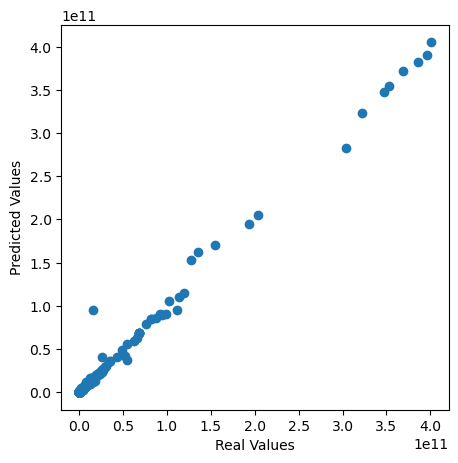

In [9]:
# Plot real values vs predicted
plt.figure(figsize=(5,5))
plt.scatter(pred_df['Real Values'], pred_df['Predicted Values'])
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show()                                            

In [10]:
# List the features sorted in descending order by feature importance
importance_sorted_idx = regressor.feature_importances_.argsort()[::-1]
for i in importance_sorted_idx:
    print(f"{X.columns[i]}: ({regressor.feature_importances_[i]})")

total_kgs_CO2_19: (0.45353682173086207)
total_kgs_CO2_32: (0.2984055901229998)
total_kgs_CO2_3: (0.11909989675644557)
total_kgs_CO_33: (0.0528485186709722)
total_kgs_CO2_39: (0.01325102245964053)
total_kgs_CO2_40: (0.010744424900914084)
total_kgs_CO2_30: (0.00850493018112393)
total_kgs_CO2_27: (0.0073203469584839295)
total_kgs_CO2_: (0.006952136269227245)
total_kgs_CO2_31: (0.005302253593100914)
total_kgs_CO2_24: (0.0043301858694964595)
total_kgs_CO2_21: (0.003789716937703999)
total_kgs_CO2_12: (0.0035647871958980953)
total_kgs_CO2_15: (0.0019868637458223893)
total_kgs_CO2_1: (0.001910379652230791)
Population: (0.0010627472940015427)
total_kgs_CO2_23: (0.001008194064658758)
total_kgs_CO2_37: (0.0009343351649848385)
total_kgs_CO2_25: (0.0007496827377279455)
total_kgs_CO2_18: (0.0007010403009320476)
total_kgs_CO2_35: (0.0006436416298621245)
total_kgs_CO2_11: (0.0005927210059442559)
total_kgs_CO2_2: (0.000422722563714538)
total_kgs_CO2_8: (0.0003201340808782628)
total_kgs_CO2_42: (0.00026

<AxesSubplot:>

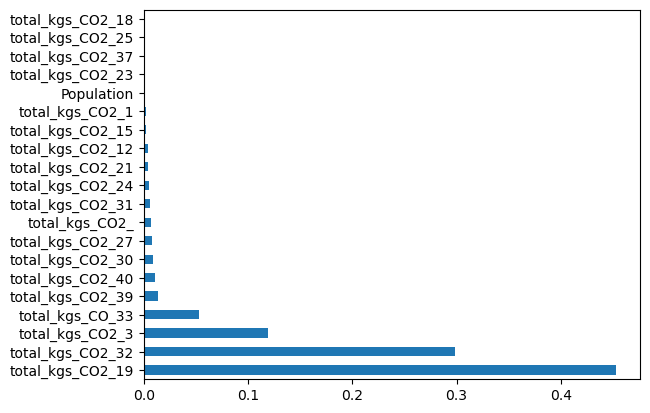

In [11]:
feat_importances = pd.Series(regressor.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [12]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [13]:
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared scores
r2 = r2_score(y_test, y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 441338770.84
Mean Squared Error: 9.226496706567215e+18
R-squared scores: 0.99


In [14]:
# Fitting Extra Trees Regressor to the dataset
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators = 10, random_state = 0)
etr.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=10, random_state=0)

In [15]:
y_pred = etr.predict(X_test)
y_pred

array([1.50624808e+08, 3.80326940e+07, 6.27823626e+07, ...,
       8.70702877e+10, 4.24472440e+06, 1.87376960e+07])

In [16]:
pred_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
pred_df

,Real Values,Predicted Values
3604,4.245974e+07,1.506248e+08
781,3.788563e+07,3.803269e+07
2165,4.881502e+07,6.278236e+07
1217,4.942875e+07,7.190991e+07
1006,7.199476e+08,7.614083e+08
...,...,...
2907,2.624575e+10,2.580387e+10
3630,3.550416e+06,3.560087e+06
3000,8.785206e+10,8.707029e+10
982,4.187952e+06,4.244724e+06


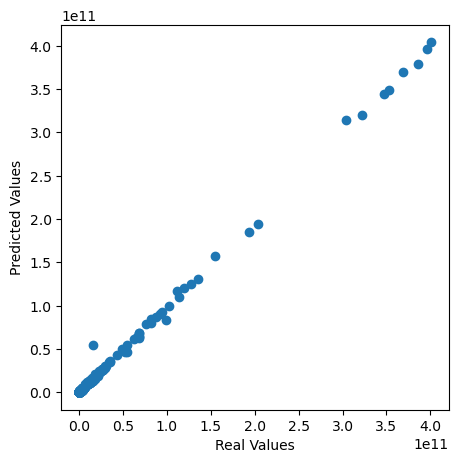

In [17]:
# Plot real values vs predicted for Extra Trees Regressor
plt.figure(figsize=(5,5))
plt.scatter(pred_df['Real Values'], pred_df['Predicted Values'])
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show() 

In [18]:
# List the features of Extra Trees Regressor sorted in descending order by feature importance
importance_sorted_idx = etr.feature_importances_.argsort()[::-1]
for i in importance_sorted_idx:
    print(f"{X.columns[i]}: ({etr.feature_importances_[i]})")

total_kgs_CO2_19: (0.2868094866556257)
total_kgs_CO2_11: (0.1783821279258086)
total_kgs_CO2_3: (0.1504742582427428)
total_kgs_CO2_20: (0.069169254143928)
total_kgs_CO2_4: (0.06818974747817594)
total_kgs_CO2_15: (0.06648321695632983)
total_kgs_CO2_42: (0.03706565154208404)
total_kgs_CO2_6: (0.02719528851378747)
total_kgs_CO2_29: (0.01621512830174123)
total_kgs_CO2_30: (0.012341112355295935)
total_kgs_CO2_17: (0.010877284029683815)
total_kgs_CO2_8: (0.007955352141802478)
total_kgs_CO_33: (0.007733312761158397)
total_kgs_CO2_21: (0.007379135361471704)
total_kgs_CO2_34: (0.007093265587593702)
total_kgs_CO2_31: (0.006830671113929672)
total_kgs_CO2_18: (0.005550141640975009)
total_kgs_CO2_43: (0.00487252634812721)
Population: (0.004139616983049798)
total_kgs_CO2_: (0.004014336410053107)
total_kgs_CO2_41: (0.003643927765045437)
total_kgs_CO2_1: (0.0029437931962158536)
total_kgs_CO2_25: (0.0023734899107341187)
total_kgs_CO2_27: (0.002120533976969421)
total_kgs_CO2_32: (0.0017300749881052526)
t

<AxesSubplot:>

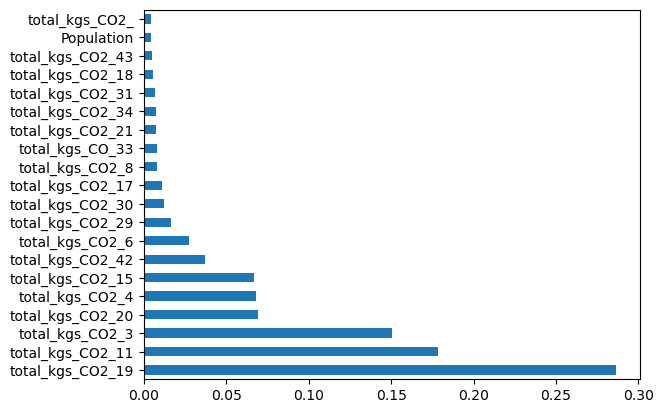

In [19]:
feat_importances = pd.Series(etr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [20]:
from sklearn.metrics import accuracy_score
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared scores
r2 = r2_score(y_test, y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 288866000.78
Mean Squared Error: 2.392718229426527e+18
R-squared scores: 1.0


In [21]:
# Fitting XG Boost Regressor to the dataset
import xgboost as xg
xgbr = xg.XGBRegressor(n_estimators = 10, random_state = 0)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [22]:
y_pred = xgbr.predict(X_test)
y_pred

array([1.3991998e+08, 1.2485682e+08, 1.2485682e+08, ..., 8.4777583e+10,
       1.3991998e+08, 2.4791568e+08], dtype=float32)

In [23]:
pred_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
pred_df

,Real Values,Predicted Values
3604,4.245974e+07,1.399200e+08
781,3.788563e+07,1.248568e+08
2165,4.881502e+07,1.248568e+08
1217,4.942875e+07,1.248568e+08
1006,7.199476e+08,2.270812e+09
...,...,...
2907,2.624575e+10,3.589700e+10
3630,3.550416e+06,1.399200e+08
3000,8.785206e+10,8.477758e+10
982,4.187952e+06,1.399200e+08


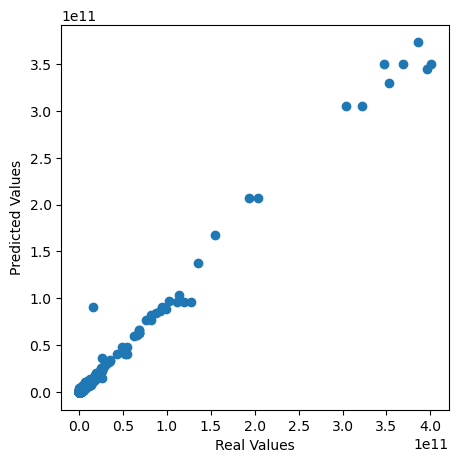

In [24]:
# Plot real values vs predicted
plt.figure(figsize=(5,5))
plt.scatter(pred_df['Real Values'], pred_df['Predicted Values'])
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show() 

In [25]:
# List the features of XG Boost Regressor sorted in descending order by feature importance
importance_sorted_idx = xgbr.feature_importances_.argsort()[::-1]
for i in importance_sorted_idx:
    print(f"{X.columns[i]}: ({xgbr.feature_importances_[i]})")

total_kgs_CO2_19: (0.7509865760803223)
total_kgs_CO2_3: (0.08461181819438934)
total_kgs_CO_33: (0.06646326184272766)
total_kgs_CO2_39: (0.02584541216492653)
total_kgs_CO2_31: (0.01444759126752615)
total_kgs_CO2_26: (0.013731377199292183)
Population: (0.00692130858078599)
total_kgs_CO2_40: (0.00442110188305378)
total_kgs_CO2_25: (0.0037574900779873133)
total_kgs_CO2_1: (0.0034908538218587637)
total_kgs_CO2_: (0.0034286021254956722)
total_kgs_CO2_8: (0.0031729857437312603)
total_kgs_CO2_32: (0.002519526518881321)
total_kgs_CO2_11: (0.002319966210052371)
total_kgs_CO2_42: (0.0018970913952216506)
total_kgs_CO2_15: (0.0018753291806206107)
total_kgs_CO2_20: (0.0013551514130085707)
total_kgs_CO2_30: (0.0011865345295518637)
total_kgs_CO2_29: (0.0011176802217960358)
total_kgs_CO2_41: (0.0010584593983367085)
total_kgs_CO2_34: (0.0009007065091282129)
total_kgs_CO2_9: (0.0007267383043654263)
total_kgs_CO2_37: (0.0006842752336524427)
total_kgs_CO2_4: (0.0005736007587984204)
total_kgs_CO2_12: (0.000

<AxesSubplot:>

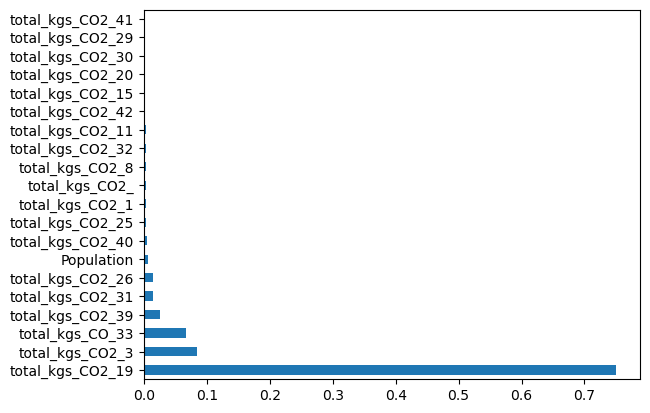

In [26]:
feat_importances = pd.Series(xgbr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [27]:
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared scores
r2 = r2_score(y_test, y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 973339725.21
Mean Squared Error: 1.5453724753182904e+19
R-squared scores: 0.99


In [44]:
# Tuning the model
# Setting the variables with top 20 features
y = df ['CO2_emissions_tonnes']
X = df [['Population','total_kgs_CO2_2','total_kgs_CO2_3','total_kgs_CO2_4','total_kgs_CO2_6','total_kgs_CO2_8','total_kgs_CO2_11','total_kgs_CO2_12','total_kgs_CO2_15','total_kgs_CO2_18','total_kgs_CO2_19','total_kgs_CO2_20','total_kgs_CO2_25','total_kgs_CO2_28','total_kgs_CO2_30','total_kgs_CO2_31','total_kgs_CO2_32','total_kgs_CO_33','total_kgs_CO2_35','total_kgs_CO2_41']]
X.shape

(4201, 20)

In [45]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape

(3150, 20)

In [46]:
# Fitting Extra Trees Regressor to the dataset
etr = ExtraTreesRegressor(n_estimators = 10, random_state = 0)
etr.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=10, random_state=0)

In [47]:
y_pred = etr.predict(X_test)
y_pred

array([4.24773427e+07, 5.36656344e+07, 4.00169472e+07, ...,
       8.81706154e+10, 4.12603040e+06, 1.95419440e+07])

In [48]:
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared scores
r2 = r2_score(y_test, y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 287839779.42
Mean Squared Error: 1.527854974380916e+18
R-squared scores: 1.0
